In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from r2_summary import _r2_intra, _r2_inter, _r2_other

# Seaborn parameters

In [2]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# File names: average R2 in the cortex, FWHM=5

In [3]:
path_results = '/data/cisl/pbellec/cneuromod_embeddings/xp_202012/r2_friends-s01_cortex/'
fwhm = 5

# DYPAC
dypac60  = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-60.p')
dypac120 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-120.p')
dypac150 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-150.p')
dypac300 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-300.p')
dypac900 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-300_state-900.p')

# DYPAC inter-subject
inter60  = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-60.p')
inter120 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-120.p')
inter150 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-150.p')
inter300 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-300.p')
inter900 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-300_state-900.p')

# DIFUMO
difumo256  = os.path.join(path_results, f'r2_fwhm-difumo256_fwhm-{fwhm}.p')
difumo512  = os.path.join(path_results, f'r2_fwhm-difumo512_fwhm-{fwhm}.p')
difumo1024 = os.path.join(path_results, f'r2_fwhm-difumo1024_fwhm-{fwhm}.p')

# MIST
mist197 = os.path.join(path_results, f'r2_fwhm-mist197_fwhm-{fwhm}.p')
mist444 = os.path.join(path_results, f'r2_fwhm-mist444_fwhm-{fwhm}.p')

# Schaefer
schaefer = os.path.join(path_results, f'r2_fwhm-schaefer_fwhm-{fwhm}.p')

# Smith
smith70 = os.path.join(path_results, f'r2_fwhm-smith_fwhm-{fwhm}.p')

# DYPAC intra vs DIFUMO
Comparing R2 quality (average in the cortex) between individual dypac900 and difumoXX (256, 512, 1024). The difumo parcellations are really impressive for group parcellations, but dypac individual has a systematic edge.

Text(0.5, 1.0, 'FWHM=5')

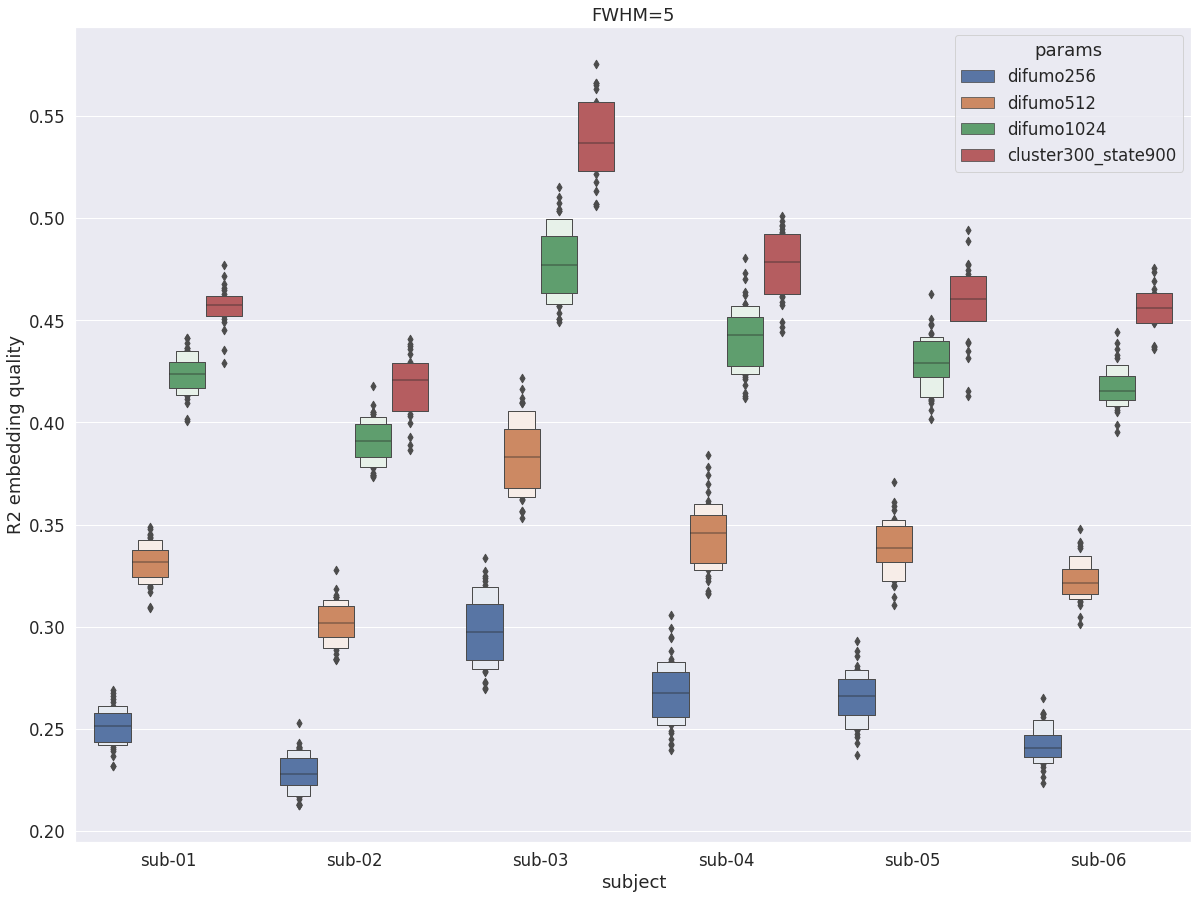

In [4]:
val_r2 = pd.read_pickle(difumo256)
val_r2 = val_r2.append(pd.read_pickle(difumo512))
val_r2 = val_r2.append(pd.read_pickle(difumo1024))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

# DYPAC intra vs MIST
When comparing dypac (cluster-300_state-900) with more traditional approaches such as low dimensional ICA (Smith70) or static group parcellations (MIST, Schaefer) the gains are massive.

Text(0.5, 1.0, 'FWHM=5')

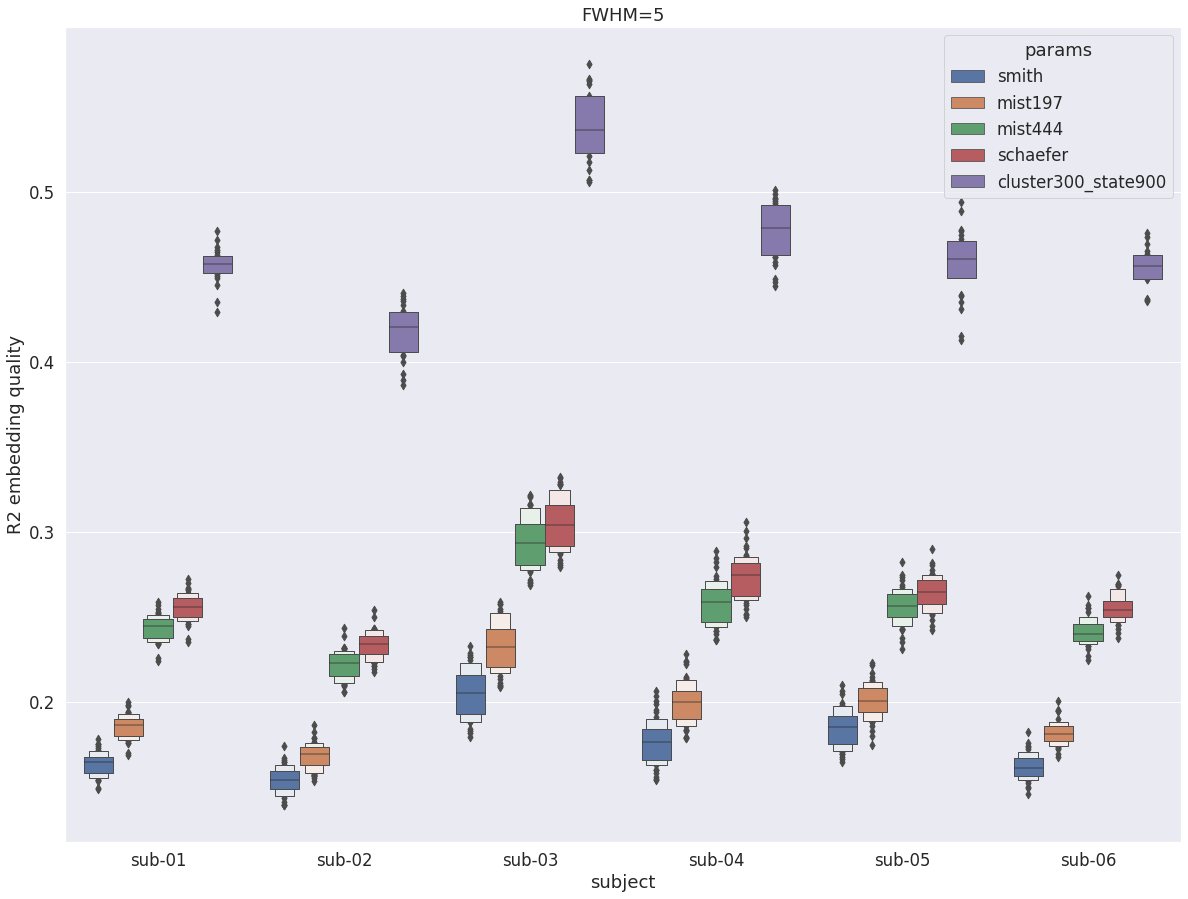

In [5]:
val_r2 = pd.read_pickle(smith70)
val_r2 = val_r2.append(pd.read_pickle(mist197))
val_r2 = val_r2.append(pd.read_pickle(mist444))
val_r2 = val_r2.append(pd.read_pickle(schaefer))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

# MIST multi resolution
This figure directly investigates the impart of cluster and stateon the dypac R2. It makes clear that the final number of states is the primary driver of R2. But even with 60 states, dypac is competitive with the best static group atlases (with hundreds of parcels), and 120 states already outperforms them. But it takes 900 individuals dypac states to outperform difumo1024.

Text(0.5, 1.0, 'FWHM=5')

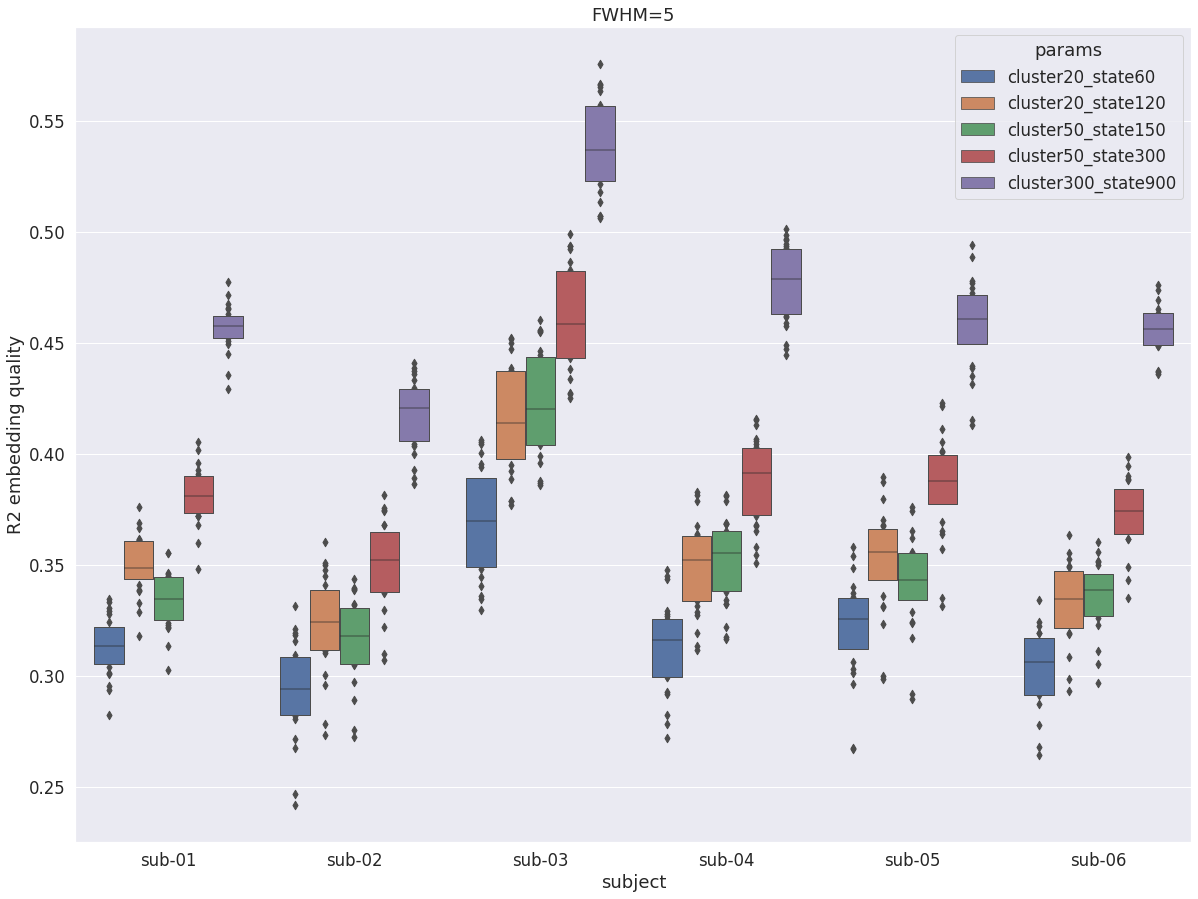

In [6]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

# intra vs inter subject R2
This figure compares intra-subject embedding quality (parcellation and data come from the same subject) vs inter-subject embedding quality (parcellation and data come from different subject). Average R2 in the cortex is systematically higher intra-subject than inter-subject.

Text(0.5, 1.0, 'FWHM=5')

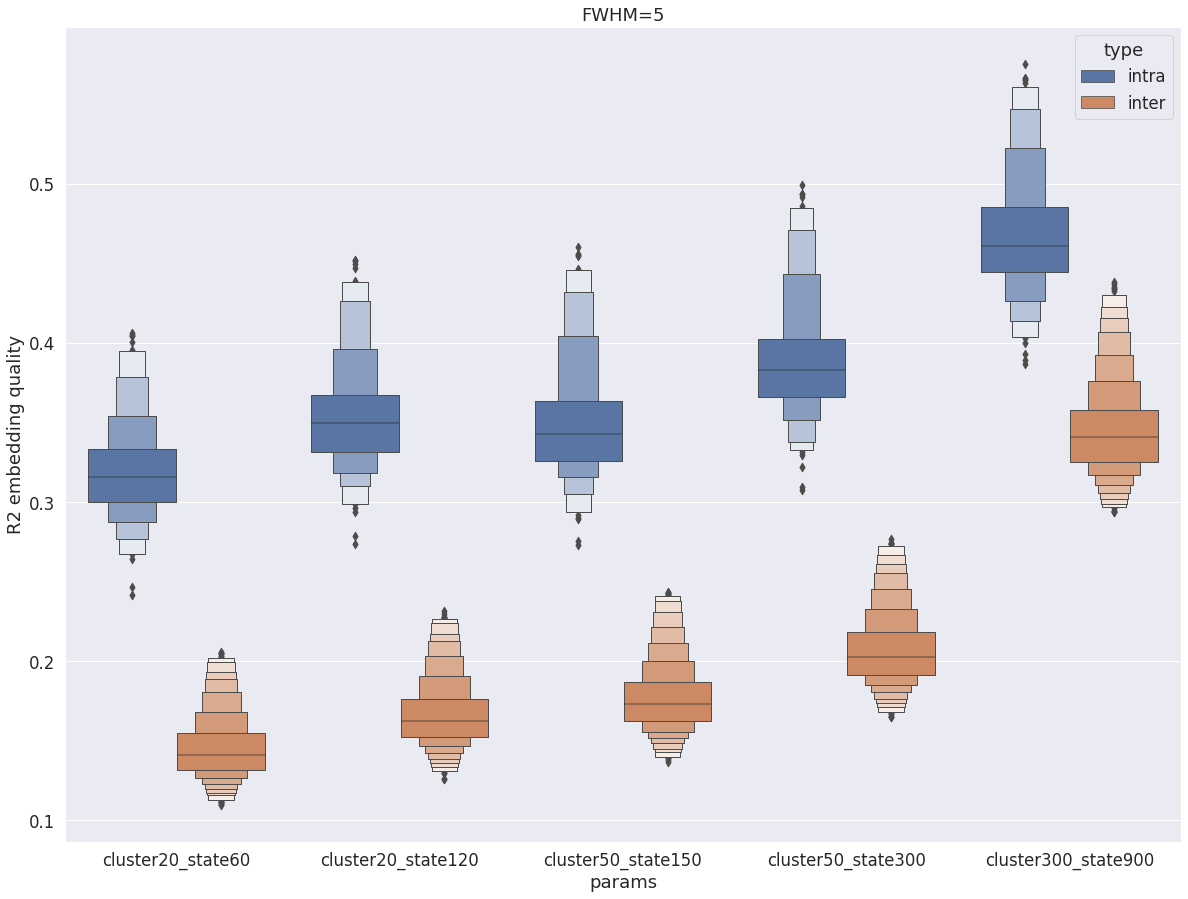

In [7]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))
val_r2 = val_r2.append(pd.read_pickle(inter60))
val_r2 = val_r2.append(pd.read_pickle(inter120))
val_r2 = val_r2.append(pd.read_pickle(inter150))
val_r2 = val_r2.append(pd.read_pickle(inter300))
val_r2 = val_r2.append(pd.read_pickle(inter900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='params', y='r2', hue='type', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

# File names: average R2 in the cortex, FWHM=8

In [8]:
path_results = '/data/cisl/pbellec/cneuromod_embeddings/xp_202012/r2_friends-s01_cortex/'
fwhm = 8

# DYPAC
dypac60  = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-60.p')
dypac120 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-120.p')
dypac150 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-150.p')
dypac300 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-300.p')
dypac900 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-300_state-900.p')

# DYPAC inter-subject
inter60  = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-60.p')
inter120 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-120.p')
inter150 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-150.p')
inter300 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-300.p')
inter900 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-300_state-900.p')

# DIFUMO
difumo256  = os.path.join(path_results, f'r2_fwhm-difumo256_fwhm-{fwhm}.p')
difumo512  = os.path.join(path_results, f'r2_fwhm-difumo512_fwhm-{fwhm}.p')
difumo1024 = os.path.join(path_results, f'r2_fwhm-difumo1024_fwhm-{fwhm}.p')

# MIST
mist197 = os.path.join(path_results, f'r2_fwhm-mist197_fwhm-{fwhm}.p')
mist444 = os.path.join(path_results, f'r2_fwhm-mist444_fwhm-{fwhm}.p')

# Schaefer
schaefer = os.path.join(path_results, f'r2_fwhm-schaefer_fwhm-{fwhm}.p')

# Smith
smith70 = os.path.join(path_results, f'r2_fwhm-smith_fwhm-{fwhm}.p')

# DYPAC intra vs DIFUMO
When repeating the experiment with `fwhm=8` the qualitative conclusions on dypac vs difumo are identical with `fwhm=5`. But a striking difference is a huge boost in R2 (almost doubling) for both parcelation. This shows that the R2 metric is very sensitive to the level of smoothness in the data. 

Text(0.5, 1.0, 'FWHM=8')

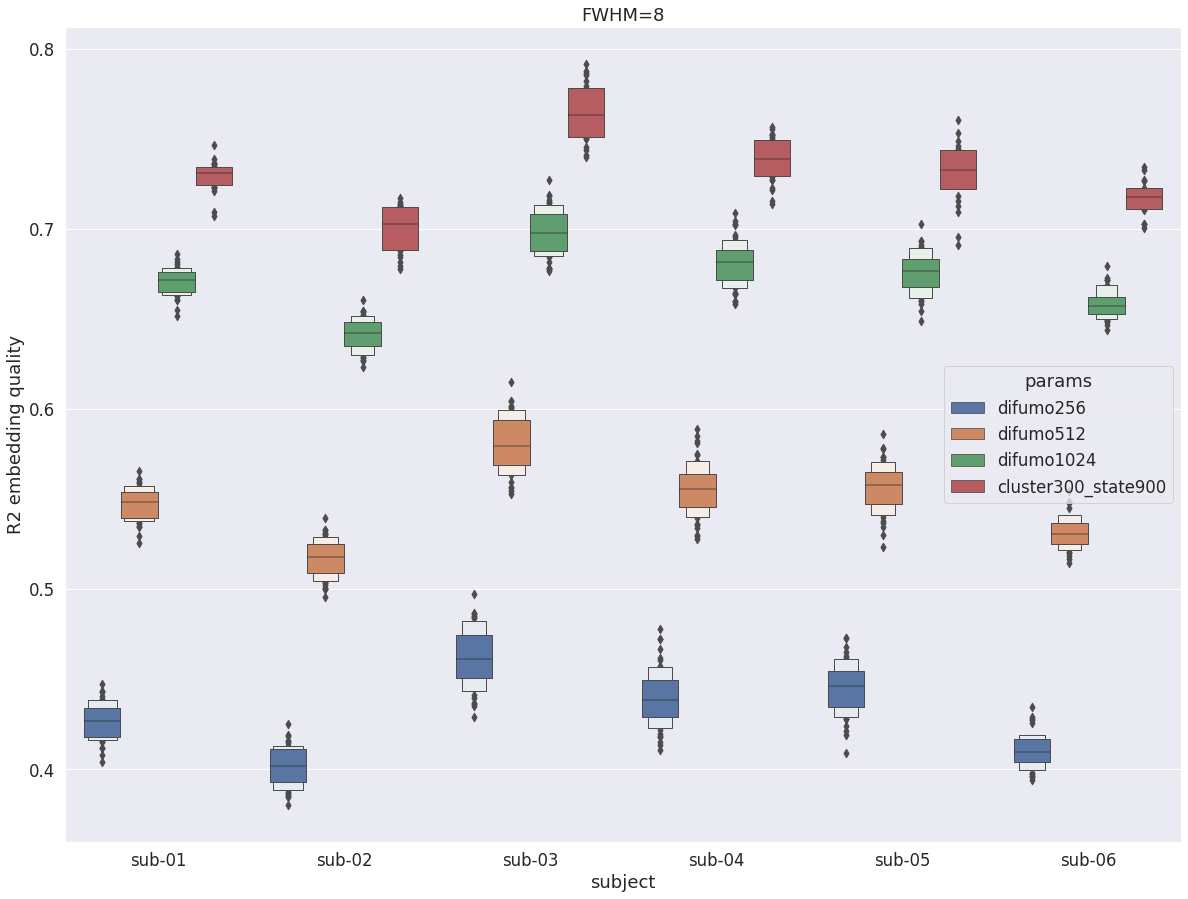

In [9]:
val_r2 = pd.read_pickle(difumo256)
val_r2 = val_r2.append(pd.read_pickle(difumo512))
val_r2 = val_r2.append(pd.read_pickle(difumo1024))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

# DYPAC intra vs MIST
The exact same observations hold for traditional parcellations: same qualitative conclusion for `fwhm=8` and `fwhm=5`, but near doubling of R2 with increased smoothing.

Text(0.5, 1.0, 'FWHM=8')

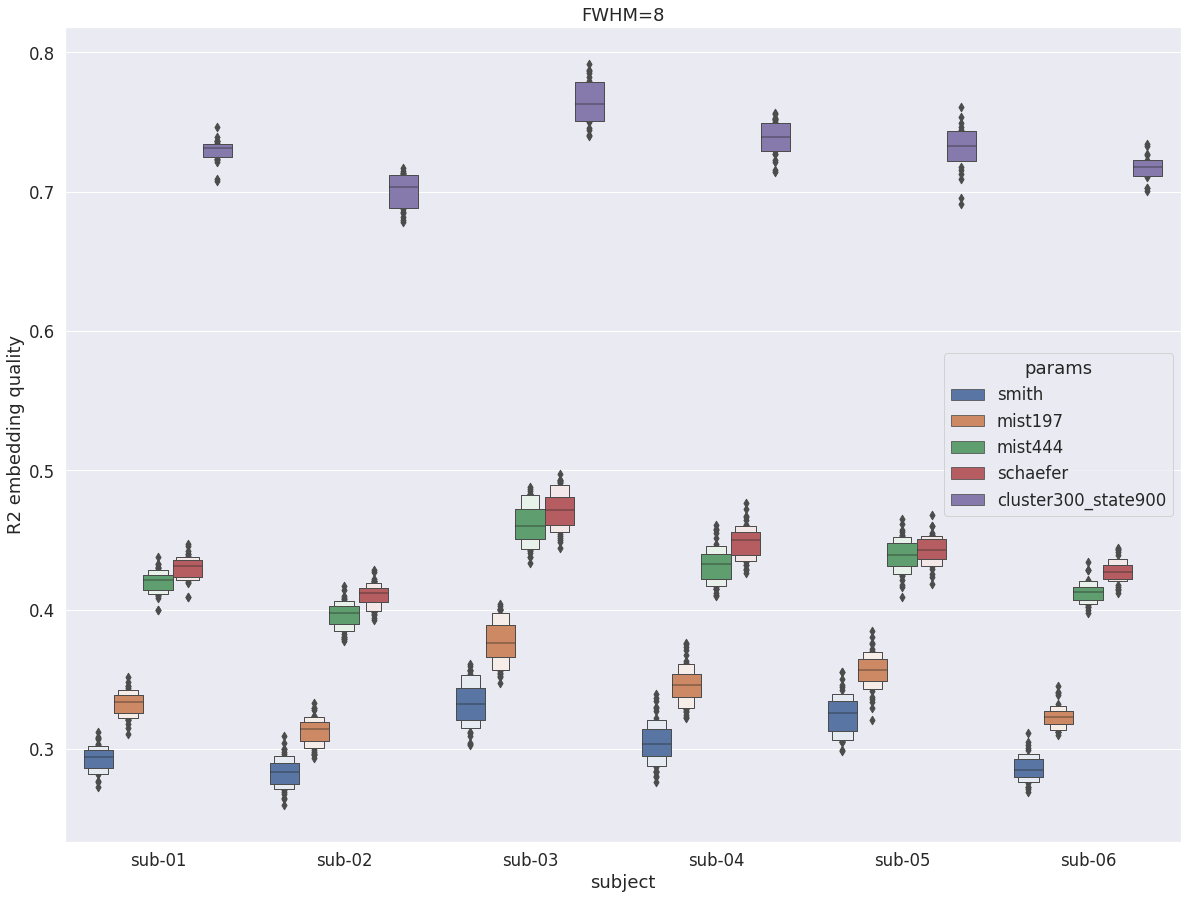

In [10]:
val_r2 = pd.read_pickle(smith70)
val_r2 = val_r2.append(pd.read_pickle(mist197))
val_r2 = val_r2.append(pd.read_pickle(mist444))
val_r2 = val_r2.append(pd.read_pickle(schaefer))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

# MIST multi resolution
Once again with `fwhm=8` we see the number of `state` being a huge driver of R4. But we can also note that modest numbers of states (120, 150) are enough to reach high levels of R2 (0.5), while 900 states provide very high R2 (0.7). The low resolution solutions are thus an accurate summary of fluctuations at low spatial resolution. So even if the R2 of 120 and 150 states is comparatively lower with `fwhm=5` they still capture important characteristics of the data, and should be investigated in parallel to a granular and high precision solution (`cluster-300_state-900`).

Text(0.5, 1.0, 'FWHM=8')

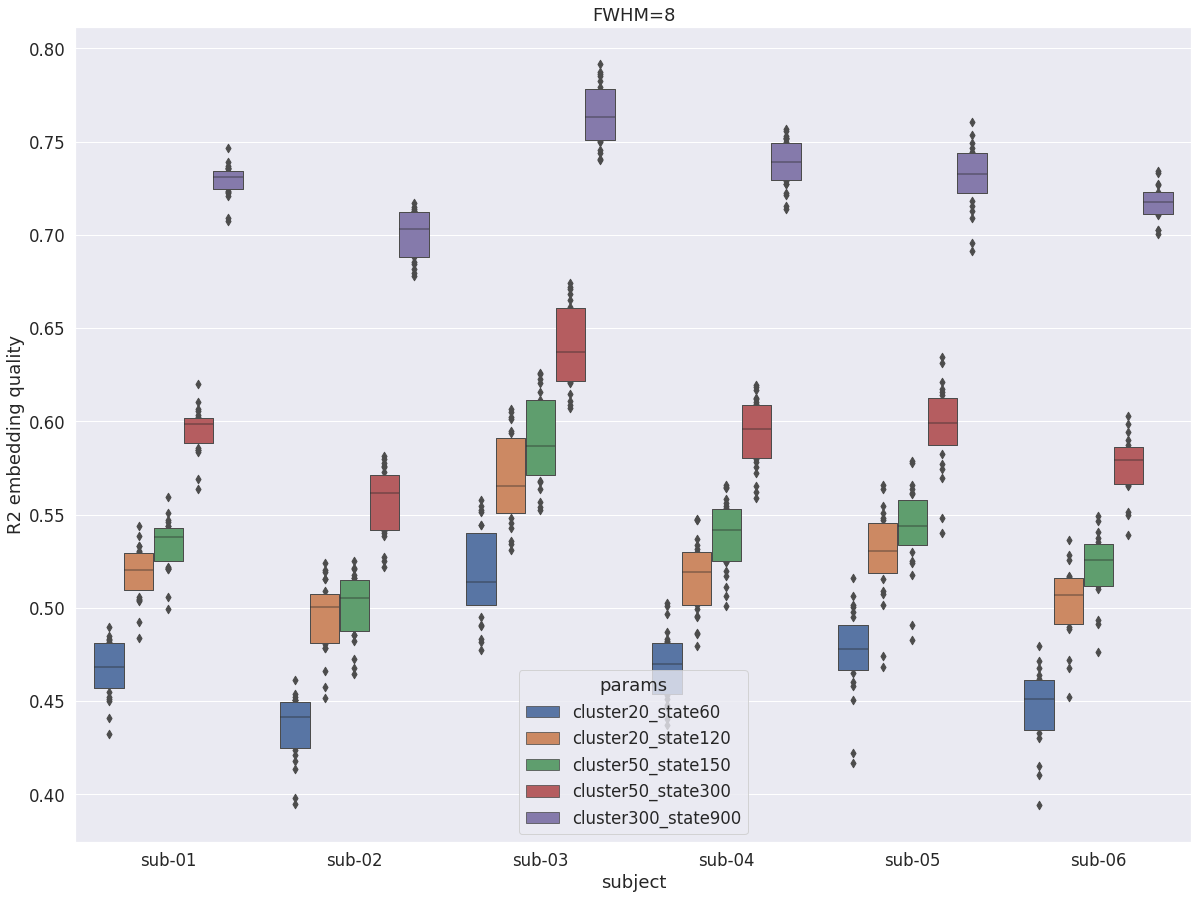

In [11]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

## Intra vs inter subject R2
Same conclusion for `fwhm=8` and `fwhm=5`: intra-subject R2 is markedly superior to inter-subject R2. However the gap tightens with `fwhm=8`. 

Text(0.5, 1.0, 'FWHM=8')

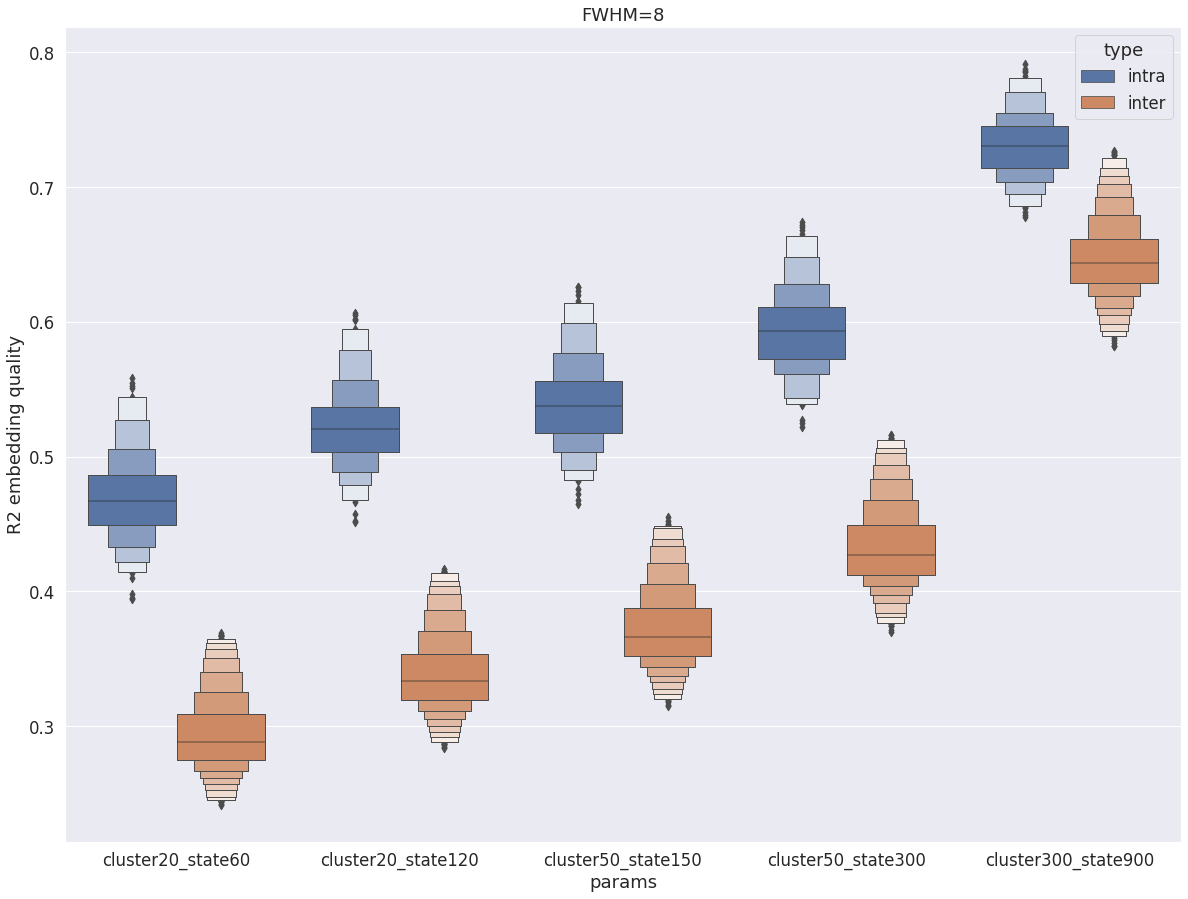

In [12]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))
val_r2 = val_r2.append(pd.read_pickle(inter60))
val_r2 = val_r2.append(pd.read_pickle(inter120))
val_r2 = val_r2.append(pd.read_pickle(inter150))
val_r2 = val_r2.append(pd.read_pickle(inter300))
val_r2 = val_r2.append(pd.read_pickle(inter900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='params', y='r2', hue='type', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')